In [1]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt

# Function to apply bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Function to compute phase-amplitude coupling (PAC) for the entire signal
def compute_pac(phase_signal, amplitude_signal):
    theta_phase = np.angle(hilbert(phase_signal))  # Phase of theta
    gamma_amplitude = np.abs(hilbert(amplitude_signal))  # Amplitude of gamma

    # Compute PAC (modulation index) for the whole signal
    pac_value = np.abs(np.mean(gamma_amplitude * np.exp(1j * theta_phase)))
    return pac_value


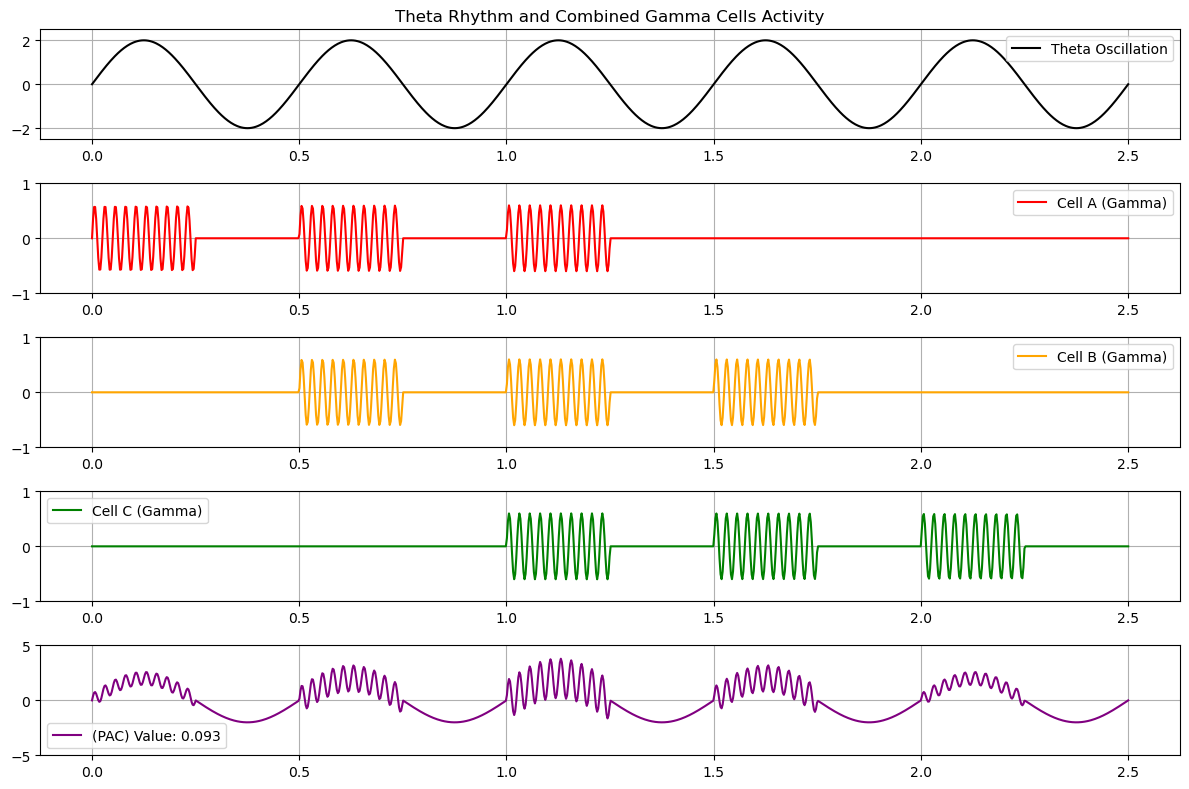

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_freq = 2  # Theta frequency in Hz
theta_amp = 2   # Theta amplitude
time = np.linspace(0, 2.5, 1000)  # Time vector (3 seconds)
theta_signal = theta_amp * np.sin(2 * np.pi * theta_freq * time)  # Theta oscillation

# Updated gamma cell activation periods
gamma_cells = {
    'A': [(0, 0.25), (0.5, 0.75), (1, 1.25)],      # A active during these intervals
    'B': [(0.5, 0.75), (1, 1.25), (1.5, 1.75)],    # B active during these intervals
    'C': [(1, 1.25), (1.5, 1.75), (2, 2.25)]       # C active during these intervals
}

# Function to generate gamma signals
def gamma_activity(time, freq, phase_shift=0):
    return np.sin(2 * np.pi * freq * time + phase_shift)

# Create the combined signal (theta + gamma)
combined_signal = theta_signal.copy()

# Gamma frequency
gamma_freq = 40  # Gamma frequency in Hz

# Colors for plotting
colors = {'A': 'red', 'B': 'orange', 'C': 'green'}

# Plot the theta rhythm and the combined gamma cells
plt.figure(figsize=(12, 8))

# Plot theta oscillation
plt.subplot(5, 1, 1)
plt.plot(time, theta_signal, color='black', label="Theta Oscillation")
plt.ylim([-2.5, 2.5])
plt.title("Theta Rhythm and Combined Gamma Cells Activity")
plt.legend()
plt.grid(True)

gamma_amp = 0.6
# Plot individual gamma cell activity for A, B, C
for i, cell in enumerate(gamma_cells):
    plt.subplot(5, 1, i + 2)
    signal = np.zeros_like(time)
    
    # Generate gamma signal for each activation period of the current cell
    for start, end in gamma_cells[cell]:
        mask = (time >= start) & (time < end)
        signal[mask] = gamma_amp*gamma_activity(time[mask], gamma_freq)
    
    plt.plot(time, signal, color=colors[cell], label=f"Cell {cell} (Gamma)")
    plt.ylim([-1, 1])
    plt.legend()
    plt.grid(True)
    
    # Add the current gamma cell signal to the combined signal (theta + gamma)
    combined_signal += signal


# Parameters
fs = 1000  # Sampling frequency (1000 Hz)

# Generate combined signal (from previous step)
# Assuming 'combined_signal' is already generated from the previous code
combined_signal = combined_signal  # Use the combined theta + gamma signal

# Filter combined signal for theta (6-10 Hz) and gamma (30-100 Hz)
theta_filtered = bandpass_filter(combined_signal, 6, 10, fs)
gamma_filtered = bandpass_filter(combined_signal, 30, 100, fs)

# Compute PAC for the entire signal
pac_value = compute_pac(theta_filtered, gamma_filtered)

# Plot combined theta + gamma activity
plt.subplot(5, 1, 5)
plt.plot(time, combined_signal, color='purple', label=f"(PAC) Value: {round(pac_value,3)}")
plt.ylim([-5, 5])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


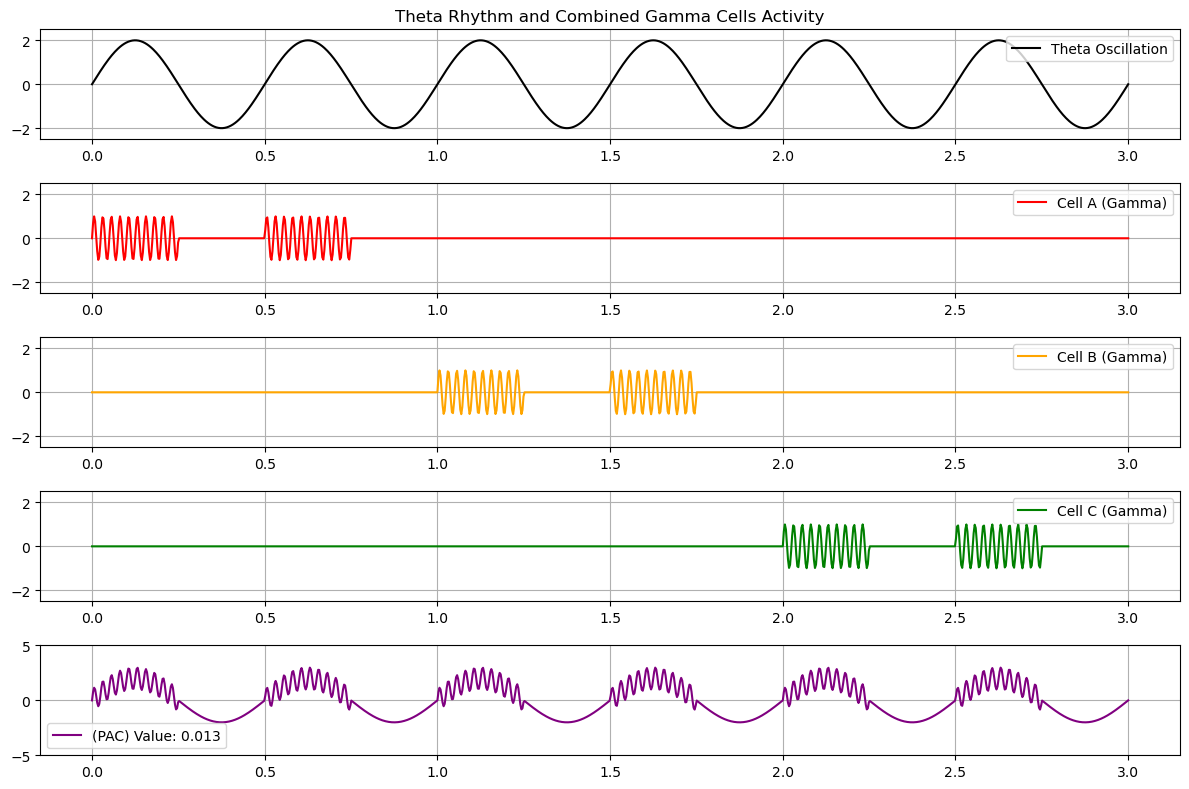

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_freq = 2  # Theta frequency in Hz
theta_amp = 2   # Theta amplitude
time = np.linspace(0, 3, 1000)  # Time vector (3 seconds)
theta_signal = theta_amp * np.sin(2 * np.pi * theta_freq * time)  # Theta oscillation

# Updated gamma cell activation periods
gamma_cells = {
    'A': [(0, 0.25), (0.5, 0.75)],      # A active during these intervals
    'B': [(1, 1.25), (1.5, 1.75)],      # B active during these intervals
    'C': [(2, 2.25), (2.5, 2.75)]       # C active during these intervals
}

# Function to generate gamma signals
def gamma_activity(time, freq, phase_shift=0):
    return np.sin(2 * np.pi * freq * time + phase_shift)

# Create the combined signal (theta + gamma)
combined_signal = theta_signal.copy()

# Gamma frequency
gamma_freq = 40  # Gamma frequency in Hz

# Colors for plotting
colors = {'A': 'red', 'B': 'orange', 'C': 'green'}

# Plot the theta rhythm and the combined gamma cells
plt.figure(figsize=(12, 8))

# Plot theta oscillation
plt.subplot(5, 1, 1)
plt.plot(time, theta_signal, color='black', label="Theta Oscillation")
plt.ylim([-2.5, 2.5])
plt.title("Theta Rhythm and Combined Gamma Cells Activity")
plt.legend()
plt.grid(True)

# Plot individual gamma cell activity for A, B, C
for i, cell in enumerate(gamma_cells):
    plt.subplot(5, 1, i + 2)
    signal = np.zeros_like(time)
    
    # Generate gamma signal for each activation period of the current cell
    for start, end in gamma_cells[cell]:
        mask = (time >= start) & (time < end)
        signal[mask] = gamma_activity(time[mask], gamma_freq)
    
    plt.plot(time, signal, color=colors[cell], label=f"Cell {cell} (Gamma)")
    plt.ylim([-2.5, 2.5])
    plt.legend()
    plt.grid(True)
    
    # Add the current gamma cell signal to the combined signal (theta + gamma)
    combined_signal += signal


# Parameters
fs = 1000  # Sampling frequency (1000 Hz)

# Generate combined signal (from previous step)
# Assuming 'combined_signal' is already generated from the previous code
combined_signal = combined_signal  # Use the combined theta + gamma signal

# Filter combined signal for theta (6-10 Hz) and gamma (30-100 Hz)
theta_filtered = bandpass_filter(combined_signal, 6, 10, fs)
gamma_filtered = bandpass_filter(combined_signal, 30, 100, fs)

# Compute PAC for the entire signal
pac_value = compute_pac(theta_filtered, gamma_filtered)

# Plot combined theta + gamma activity
plt.subplot(5, 1, 5)
plt.plot(time, combined_signal, color='purple', label=f"(PAC) Value: {round(pac_value,3)}")
plt.ylim([-5, 5])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


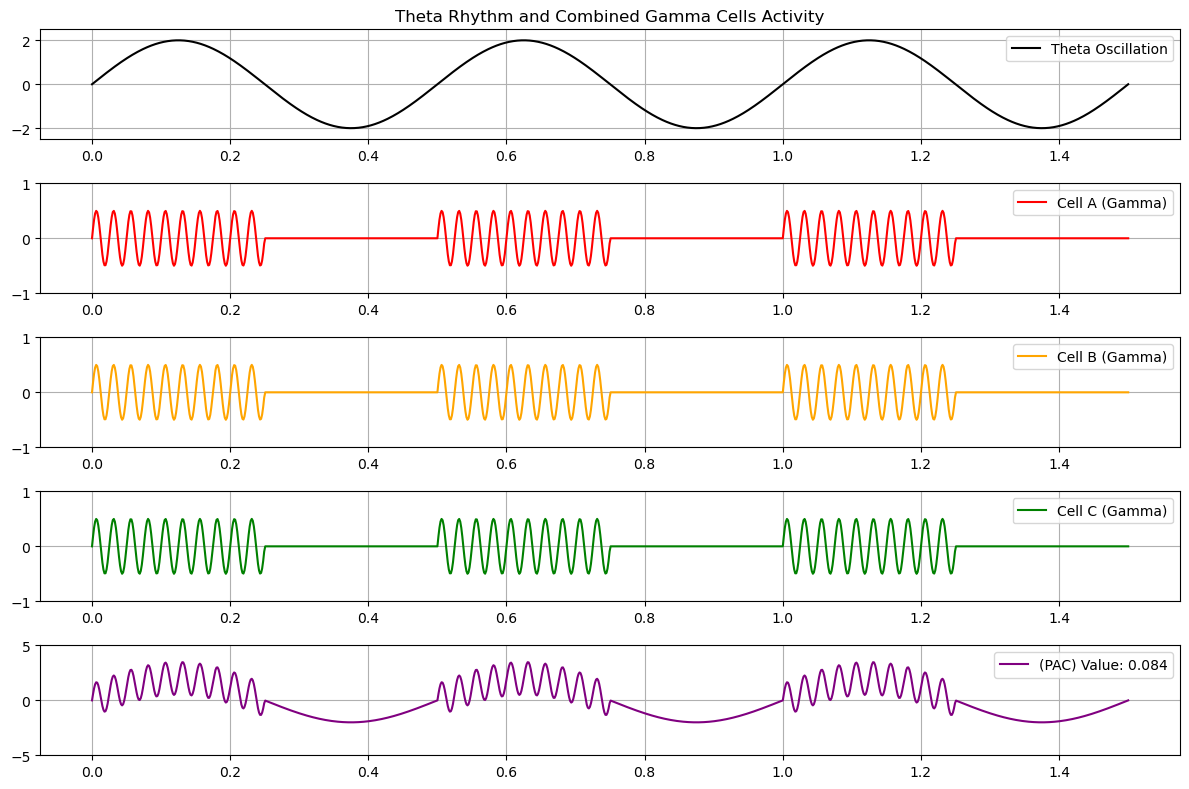

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_freq = 2  # Theta frequency in Hz
theta_amp = 2   # Theta amplitude
time = np.linspace(0, 1.5, 1000)  # Time vector (3 seconds)
theta_signal = theta_amp * np.sin(2 * np.pi * theta_freq * time)  # Theta oscillation

# Updated gamma cell activation periods
gamma_cells = {
    'A': [(0, 0.25), (0.5, 0.75), (1, 1.25)],      # A active during these intervals
    'B': [(0, 0.25), (0.5, 0.75), (1, 1.25)],    # B active during these intervals
    'C': [(0, 0.25), (0.5, 0.75), (1, 1.25)]       # C active during these intervals
}


# Function to generate gamma signals
def gamma_activity(time, freq, phase_shift=0):
    return np.sin(2 * np.pi * freq * time + phase_shift)

# Create the combined signal (theta + gamma)
combined_signal = theta_signal.copy()

# Gamma frequency
gamma_freq = 40  # Gamma frequency in Hz

# Colors for plotting
colors = {'A': 'red', 'B': 'orange', 'C': 'green'}

# Plot the theta rhythm and the combined gamma cells
plt.figure(figsize=(12, 8))

# Plot theta oscillation
plt.subplot(5, 1, 1)
plt.plot(time, theta_signal, color='black', label="Theta Oscillation")
plt.ylim([-2.5, 2.5])
plt.title("Theta Rhythm and Combined Gamma Cells Activity")
plt.legend()
plt.grid(True)

gamma_amp = 0.5
# Plot individual gamma cell activity for A, B, C
for i, cell in enumerate(gamma_cells):
    plt.subplot(5, 1, i + 2)
    signal = np.zeros_like(time)
    
    # Generate gamma signal for each activation period of the current cell
    for start, end in gamma_cells[cell]:
        mask = (time >= start) & (time < end)
        signal[mask] = gamma_amp*gamma_activity(time[mask], gamma_freq)
    
    plt.plot(time, signal, color=colors[cell], label=f"Cell {cell} (Gamma)")
    plt.ylim([-1, 1])
    plt.legend()
    plt.grid(True)
    
    # Add the current gamma cell signal to the combined signal (theta + gamma)
    combined_signal += signal


# Parameters
fs = 1000  # Sampling frequency (1000 Hz)

# Generate combined signal (from previous step)
# Assuming 'combined_signal' is already generated from the previous code
combined_signal = combined_signal  # Use the combined theta + gamma signal

# Filter combined signal for theta (6-10 Hz) and gamma (30-100 Hz)
theta_filtered = bandpass_filter(combined_signal, 6, 10, fs)
gamma_filtered = bandpass_filter(combined_signal, 30, 100, fs)

# Compute PAC for the entire signal
pac_value = compute_pac(theta_filtered, gamma_filtered)

# Plot combined theta + gamma activity
plt.subplot(5, 1, 5)
plt.plot(time, combined_signal, color='purple', label=f"(PAC) Value: {round(pac_value,3)}")
plt.ylim([-5, 5])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
# adding Arousal's gain
# combined signal (puprple) as input x_t, and r_t(g) as output

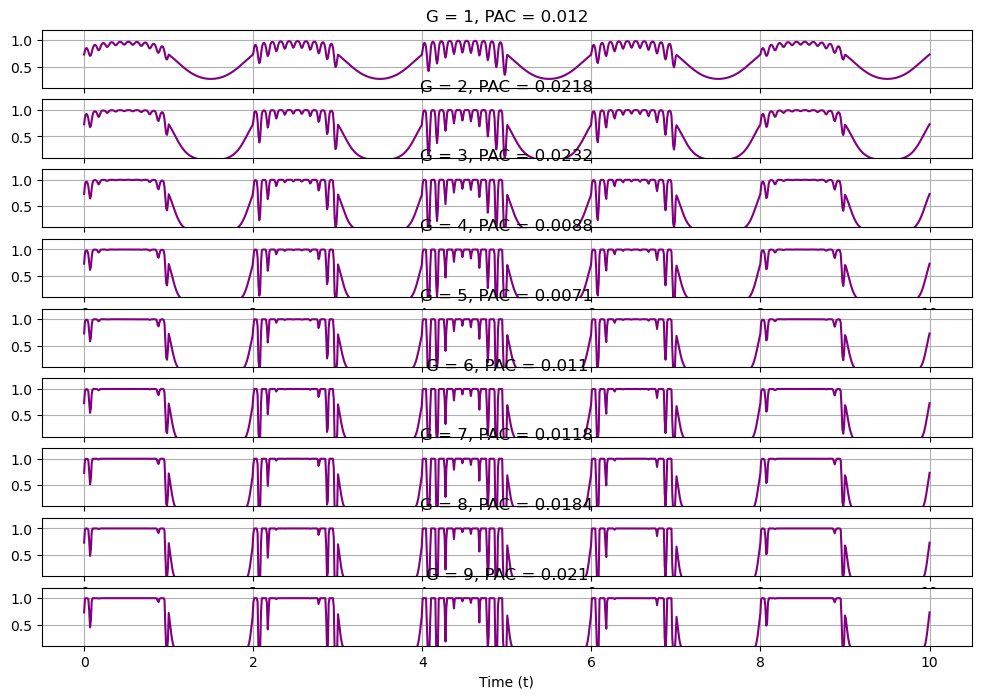

In [3]:
import numpy as np
import scipy.signal as signal
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Function to calculate phase-amplitude coupling (Modulation Index) using Tort method
def modulation_index(low_freq_signal, high_freq_signal, num_bins=18):
    # Extract phase of the low-frequency signal
    low_freq_phase = np.angle(signal.hilbert(low_freq_signal))
    
    # Extract amplitude envelope of the high-frequency signal
    high_freq_amplitude = np.abs(signal.hilbert(high_freq_signal))
    
    # Bin the phase data
    phase_bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    amplitude_means = np.zeros(num_bins)
    
    # Average high-frequency amplitude in each phase bin
    for i in range(num_bins):
        indices = np.where((low_freq_phase >= phase_bins[i]) & (low_freq_phase < phase_bins[i + 1]))[0]
        amplitude_means[i] = np.mean(high_freq_amplitude[indices])
    
    # Normalize amplitude means to create a probability distribution
    amplitude_means /= np.sum(amplitude_means)
    
    # Calculate modulation index as the Kullback-Leibler divergence between uniform and observed distributions
    uniform_dist = np.ones(num_bins) / num_bins
    mi = entropy(amplitude_means, uniform_dist)
    
    return mi

# Parameters
G_values = [1, 2, 3,4, 5, 6, 7, 8, 9]  # Different G values to test
B = 1.0
A1, A2, A3 = 0.9, 0.6, 0.3       # Amplitudes for the components
omega1, omega2, omega3 = 40.0, 60.0, 5.0  # Frequencies for the components
t = np.linspace(0, 10, 1000)  # Time array

# Input signal x(t) as a combination of 2 high frequencies and 1 low frequency
x_t = A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t) + A3 * np.sin(omega3 * t)

# Low-frequency component (for PAC analysis)
low_freq_component = A3 * np.sin(omega3 * t)
high_freq_component_combined = A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t)

# Calculate Modulation Index for the input signal x(t)
mi_x_t = modulation_index(low_freq_component, high_freq_component_combined)

# Calculate Modulation Index for r(t) with different G values
mi_r_t_values = []

for G_test in G_values:
    r_t_test = 1 / (1 + np.exp(-(G_test * x_t + B)))
    mi_r_t = modulation_index(low_freq_component, r_t_test)
    mi_r_t_values.append(mi_r_t)

x_t = combined_signal


# Plot x(t) and r(t) for G = 0.2 and G = 0.8
G_plot_values = [x * 1 for x in G_values]

plt.figure(figsize=(12, 8))

for i, G in enumerate(G_plot_values):
    r_t = 1 / (1 + np.exp(-(G * x_t + B)))

    # Compute PAC for the entire signal
    pac_value = compute_pac(bandpass_filter(r_t, 6, 10, fs), bandpass_filter(r_t, 30, 100, fs))
    
    plt.subplot(len(G_plot_values), 1, i + 1)
    #plt.plot(t, x_t, label='x(t)', color='blue')
    plt.plot(t, r_t, label=f'r(t) for G = {round(G,2)}', color='purple')
    plt.title(f'G = {round(G,2)}, PAC = {round(pac_value,4)}')
    plt.ylim([0.1, 1.2])
    plt.xlabel('Time (t)')
    #plt.ylabel('Amplitude')
    #plt.legend()
    plt.grid(True)

# Save the plots
plt.savefig('/Users/ali/Desktop/xt_rt_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI
#plt.savefig('xt_rt_plot.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with 300 DPI

plt.show()
